# SVM

In [1]:
execfile('setting.py')

## 데이터 구성하기

In [2]:
# 데이터 불러오기
df_raw = pd.read_csv(path2+"유방암.csv", encoding = 'euc-kr')
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [3]:
def fun_data_layout(v_data):
    print("Data 구조:", v_data.shape)
    print()
    print("변수 : ", v_data.columns)
    print()
    print("info : ", v_data.info())

## 데이터 전처리

### 데이터 결측치 확인

In [4]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

### 범주형 데이터 replace

In [5]:
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)

### 데이터 분할

In [6]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

### 기본 옵션으로 SVC 모델 생성

In [7]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.885
Accuracy on test set: 0.891


### C: 규제에 대한 강도 변경

In [8]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# c: 규제(0.01, 0.1, 1, 10, 100)
para_c = [10 *c for c in range(1, 11)]
# para_c = [0.1 * c for c in range(1, 11)] )] # C 변화 구간 변경: 0.1~1.0

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

# Gamma별 정확도 테이블
df_accuracy_c.round(4)

C  TrainAccuracy  TestAccuracy
0   10         0.9062        0.9219
1   20         0.9167        0.9297
2   30         0.9167        0.9297
3   40         0.9219        0.9297
4   50         0.9219        0.9297
5   60         0.9167        0.9297
6   70         0.9167        0.9297
7   80         0.9167        0.9297
8   90         0.9271        0.9297
9  100         0.9271        0.9297

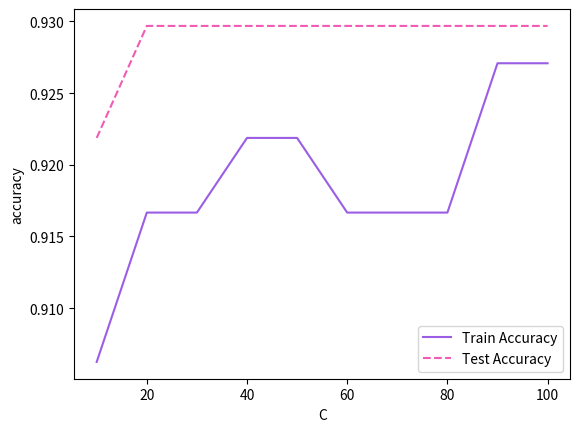

In [9]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [10]:
# C값 10으로 설정
C = 40

### Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [11]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# gamma: 규제(0.01, 0.1, 1, 10)
para_gamma = [10 **gamma for gamma in range(-5, 5)]

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 40, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

# Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

gamma  TrainAccuracy  TestAccuracy
0      0.0000         0.9583        0.9531
1      0.0001         0.9896        0.9297
2      0.0010         1.0000        0.9141
3      0.0100         1.0000        0.7969
4      0.1000         1.0000        0.7656
5      1.0000         1.0000        0.7656
6     10.0000         1.0000        0.7656
7    100.0000         1.0000        0.7656
8   1000.0000         1.0000        0.7656
9  10000.0000         1.0000        0.7656

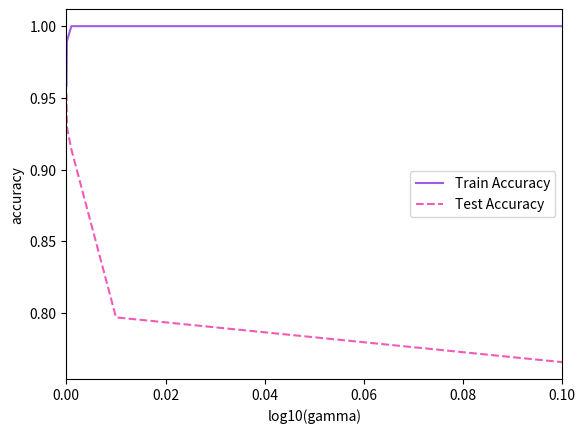

In [12]:
import numpy as np
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("log10(gamma)")
plt.xlim(0, 0.1)
plt.legend()

In [13]:
# gamma값 10으로 설정
gamma = 0.0001

### scale 변환

In [14]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

df_scaled.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0               -0.392627  ...     -0.149283      -1.156442        -0.153789   
1                0.184077  ...     -1.341759      -2.517236        -1.380396   
2               -1.174101  ...      0.534893      -0.143296         0.445031   
3               -0.834209  ...     -0.263312      -1.490846        -0.312546   
4               -0.956793  ...     -0.951354      -1.934512        -0.997708   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0   -0.224951          0.490637           0.139396        -0.094470   
1   -1.124201          0.254373          -1.046076        -1.159323   
2    0.432104         -0.613360          -0.367031         0.004076   
3   -0.354487         -1.339335          -0.169261        -0.176669   
4   -0.869505         -1.783511          -1.108951        -1.094404   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0             -0.301949        0.525611                 0.511081  
1             -1.480312       -1.387506                -0.507149  
2              0.172850        0.223844                -0.886803  
3             -0.458230       -0.524077                -0.220788  
4             -1.366747       -1.071301                -0.898278  

[5 rows x 30 columns]

In [15]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("train data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
train data Y size : (128, 30)


### scale 조절 후 SVC 모델 재실행

In [16]:
svm_scaled = SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.995
Accuracy on test set: 0.961


### scale 변환 후 C: 규제에 대한 강도 변경

In [17]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; 
test_accuracy = []
# c: 규제(0.1 ~2.0)
para_c = [c * 0.1 for c in range(1,21)]
# para_c = [10 **c for c in range(-2, 3)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy

# C별 정확도 테이블 
df_accuracy_c.round(3)

C  TrainAccuracy  TestAccuracy
0   0.1          0.964         0.906
1   0.2          0.969         0.930
2   0.3          0.974         0.930
3   0.4          0.979         0.938
4   0.5          0.984         0.930
5   0.6          0.995         0.938
6   0.7          0.995         0.945
7   0.8          0.995         0.953
8   0.9          0.995         0.953
9   1.0          0.995         0.961
10  1.1          0.995         0.961
11  1.2          0.995         0.961
12  1.3          0.995         0.961
13  1.4          0.995         0.961
14  1.5          0.995         0.961
15  1.6          0.995         0.961
16  1.7          0.995         0.961
17  1.8          0.995         0.961
18  1.9          0.995         0.961
19  2.0          0.995         0.961

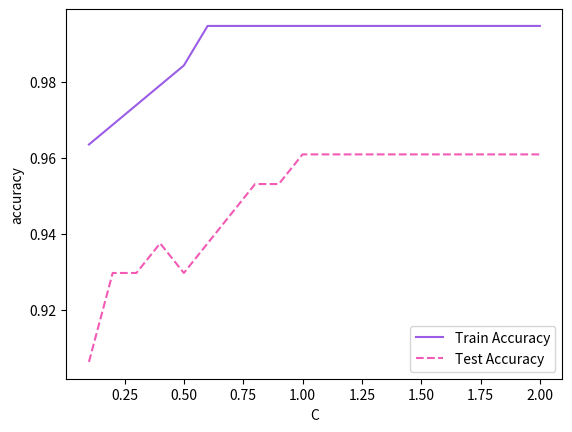

In [18]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

In [19]:
C = 1

### scale 변환 후Gamma: 훈련 샘플이 미치는 영향의 범위를 변경

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# para_gamma = [10 **gamma for gamma in range(-2, 2)] # 0.01, 0.1, 1, 10)
para_gamma = [0.01 * gamma for gamma in range(1, 15)] # 0.05 ~ 0.70

for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C=1, random_state = 1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy

# Gamma별 정확도 테이블 
df_accuracy_gamma.round(3)

gamma  TrainAccuracy  TestAccuracy
0    0.01          0.995         0.938
1    0.02          0.995         0.953
2    0.03          0.995         0.961
3    0.04          0.995         0.953
4    0.05          0.995         0.938
5    0.06          0.995         0.930
6    0.07          0.995         0.922
7    0.08          0.995         0.922
8    0.09          0.995         0.922
9    0.10          1.000         0.922
10   0.11          1.000         0.922
11   0.12          1.000         0.914
12   0.13          1.000         0.914
13   0.14          1.000         0.906

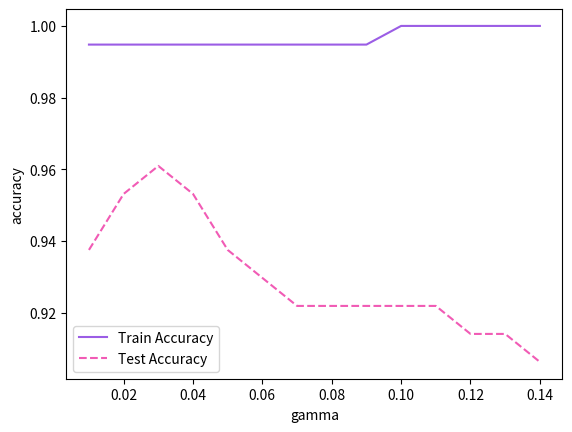

In [21]:
# Gamma별 정확도 그래프로 확인
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

In [22]:
# 임의로 지정
gamma = 0.03

## 결론 도출

### scale 이전

In [23]:
# 최종 모델
svc_final = SVC(gamma = 0.0001, C = 40, random_state=1234)
svc_final.fit(df_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.990
Accuracy on test set: 0.930

Confusion matrix: 
[[90  7]
 [ 2 29]]
              precision    recall  f1-score   support

           0      0.978     0.928     0.952        97
           1      0.806     0.935     0.866        31

    accuracy                          0.930       128
   macro avg      0.892     0.932     0.909       128
weighted avg      0.936     0.930     0.931       128



### scale 이후

In [24]:
# 최종 모델
svc_final = SVC(gamma = 0.03, C = 1, random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.995
Accuracy on test set: 0.961

Confusion matrix: 
[[92  5]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.948     0.974        97
           1      0.861     1.000     0.925        31

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



### Grid Search

In [25]:
estimator = SVC(random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {"C": para_c,
              "gamma": para_gamma}
# 정확도가 높은 최적 parameter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy", n_jobs = -1)
grid_rf.fit(df_scaled_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n{}".format(grid_rf.best_params_))
print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=1.7000000000000002, gamma=0.01, random_state=1234)

best parameter: 
{'C': 1.7000000000000002, 'gamma': 0.01}

best score: 
0.989


In [26]:
# 최종 모델
svc_grid = SVC(gamma = 0.01, C = 1.7, random_state=1234)
svc_grid.fit(df_scaled_train_x, df_train_y)
# 평가
y_pred = svc_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(svc_grid.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(svc_grid.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

Accucary on training set: 0.995
Accuracy on test set: 0.945

Confusion matrix: 
[[92  5]
 [ 0 31]]
              precision    recall  f1-score   support

           0      1.000     0.948     0.974        97
           1      0.861     1.000     0.925        31

    accuracy                          0.961       128
   macro avg      0.931     0.974     0.949       128
weighted avg      0.966     0.961     0.962       128



In [27]:
# Accuracy : scale 이전 모델 < gridSearch 모델 < scale 모델
# weighted avg : scale 이전 모델 < gridSearch 모델 = scale 모델